mini batch gradient descent


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X=2*np.random.rand(100,1)
Y=4+3*X+np.random.randn(100,1) # Fixed variable name from 'x' to 'X'
X_b=np.c_[np.ones((100,1)),X]
def mini_batch_gradient_descent(X,Y,learning_rate=0.1,n_iterations=50,batch_size=50):
    m=len(Y) # Changed y to Y
    theta=np.random.randn(2,1)
    for iteration in range(n_iterations):
        shuffled_indices=np.random.permutation(m)
        X_shuffled_indices=X[shuffled_indices] # Changed x to X
        y_shuffled_indices=Y[shuffled_indices] # Changed y to Y
        for i in range (0,m,batch_size):
            xi=X_shuffled_indices[i:i+batch_size]
            yi=y_shuffled_indices[i:i+batch_size]
            gradients=2/m*xi.T.dot(xi.dot(theta)-yi)
            theta=theta-learning_rate*gradients
    return theta # De-indent this line to match function definition

theta_mbgd=stochastic_gradient_descent(X_b,Y)
print("theta_mbgd:",theta_sgd)

theta_mbgd: [[4.33483995]
 [2.43658052]]


stochastic gradient descent


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X=2*np.random.rand(100,1)
Y=4+3*X+np.random.randn(100,1) # Fixed variable name from 'x' to 'X'
X_b=np.c_[np.ones((100,1)),X]
def stochastic_gradient_descent(X,Y,n_epochs=50,learning_rate=0.1):

    m=len(Y) # Changed y to Y to match the function parameter
    theta=np.random.randn(2,1)
    for epoch in range(n_epochs):
        for i in range(m):
          random_index=np.random.randint(m)
          xi=X[random_index:random_index+1]
          yi=Y[random_index:random_index+1] # Changed y to Y to match the function parameter
          gradients=2*xi.T.dot(xi.dot(theta)-yi)
          theta=theta-learning_rate*gradients
    return theta
# Unindent these two lines to be outside the function definition
theta_sgd=stochastic_gradient_descent(X_b,Y)
print("SGDtheta:",theta_sgd)

SGDtheta: [[4.33483995]
 [2.43658052]]


batch gradient descent

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X=2*np.random.rand(100,1)
Y=4+3*X+np.random.randn(100,1) # Fixed variable name from 'x' to 'X'
X_b=np.c_[np.ones((100,1)),X]

def batch_gradient_descent(X_b,Y):
    eta=0.1
    n_iterations=1000
    m=100

    theta=np.random.randn(2,1)

    for iteration in range(n_iterations):
        gradients=2/m*X_b.T.dot(X_b.dot(theta)-Y)
        theta=theta-eta*gradients
    return theta

theta_bgd=batch_gradient_descent(X_b,Y)
print("BGDtheta:",theta_bgd)

BGDtheta: [[4.21509616]
 [2.77011339]]


Batch Gradient Descent theta: [[2.96262018]
 [3.80192916]]
Momentum-based Gradient Descent theta: [[4.21674229]
 [2.76149943]]
Adagrad theta: [[ 0.80977188]
 [-0.67305143]]
RMSProp theta: [[-0.00438369]
 [ 1.54690482]]


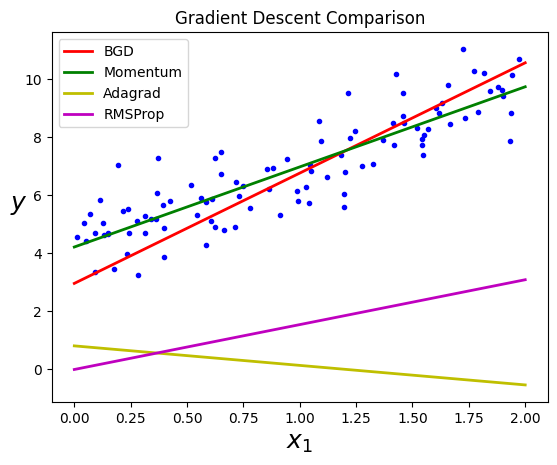

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Generate data
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]

# Batch Gradient Descent
def batch_gradient_descent(X_b, Y, eta=0.01, n_iterations=100):
    m = len(X_b)
    theta = np.random.randn(2, 1)
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - Y)
        theta -= eta * gradients
    return theta

# Momentum-based Gradient Descent
def momentum_gradient_descent(X_b, Y, eta=0.01, n_iterations=100, momentum=0.9):
    m = len(X_b)
    theta = np.random.randn(2, 1)
    velocity = np.zeros_like(theta)
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - Y)
        velocity = momentum * velocity - eta * gradients
        theta += velocity
    return theta
# Adagrad
def adagrad(X_b, Y, eta=0.01, n_iterations=100, epsilon=1e-8):
    m = len(X_b)
    theta = np.random.randn(2, 1)
    G = np.zeros_like(theta)
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - Y)
        G += gradients**2
        adjusted_eta = eta / (np.sqrt(G) + epsilon)
        theta -= adjusted_eta * gradients
    return theta

# RMSProp
def rmsprop(X_b, Y, eta=0.01, n_iterations=100, beta=0.9, epsilon=1e-8):
    m = len(X_b)
    theta = np.random.randn(2, 1)
    G = np.zeros_like(theta)
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - Y)
        G = beta * G + (1 - beta) * gradients**2
        adjusted_eta = eta / (np.sqrt(G) + epsilon)
        theta -= adjusted_eta * gradients
    return theta

# Compute theta values
theta_bgd = batch_gradient_descent(X_b, Y)
theta_momentum = momentum_gradient_descent(X_b, Y)
theta_adagrad = adagrad(X_b, Y)
theta_rmsprop = rmsprop(X_b, Y)
print("Batch Gradient Descent theta:", theta_bgd)
print("Momentum-based Gradient Descent theta:", theta_momentum)
print("Adagrad theta:", theta_adagrad)
print("RMSProp theta:", theta_rmsprop)

# Plotting function
def plot_gradient_descent(X, y, theta_bgd, theta_momentum, theta_adagrad, theta_rmsprop):
    plt.plot(X, y, "b.")
    X_new = np.array([[0], [2]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]

    y_predict_bgd = X_new_b.dot(theta_bgd)
    y_predict_momentum = X_new_b.dot(theta_momentum)
    y_predict_adagrad = X_new_b.dot(theta_adagrad)
    y_predict_rmsprop = X_new_b.dot(theta_rmsprop)

    plt.plot(X_new, y_predict_bgd, "r-", linewidth=2, label="BGD")
    plt.plot(X_new, y_predict_momentum, "g-", linewidth=2, label="Momentum")
    plt.plot(X_new, y_predict_adagrad, "y-", linewidth=2, label="Adagrad")
    plt.plot(X_new, y_predict_rmsprop, "m-", linewidth=2, label="RMSProp")

    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.legend(loc="upper left")
    plt.title("Gradient Descent Comparison")
    plt.show()

# Plot results
plot_gradient_descent(X, Y, theta_bgd, theta_momentum, theta_adagrad, theta_rmsprop)
